# Protein dataset data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df_dup = pd.read_csv("protein\\pdb_data_no_dups.csv")
df_seq = pd.read_csv("protein\\pdb_data_seq.csv")
df_dup.head()

### let's understand dataframes

In [4]:
print("The dataframe has {} rows and {} columns.".format(df_dup.iloc[:,0].shape, df_dup.iloc[0,:].shape))

The dataframe has (141401,) rows and (14,) columns.


In [5]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [6]:
df_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [7]:
print("The dataframe has {} rows and {} columns.".format(df_seq.iloc[:,0].shape, df_seq.iloc[0,:].shape))

The dataframe has (467304,) rows and (5,) columns.


In [8]:
## sequence has some repeated entries so lets drop the duplicates
df_seq.drop_duplicates(subset='sequence', inplace=True)

In [9]:
print("After removing the duplicates, the dataframe has {} rows and {} columns.".format(df_seq.iloc[:,0].shape, df_seq.iloc[0,:].shape))

After removing the duplicates, the dataframe has (104813,) rows and (5,) columns.


In [10]:
df_seq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104813 entries, 0 to 467295
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        104813 non-null  object
 1   chainId            104812 non-null  object
 2   sequence           104812 non-null  object
 3   residueCount       104813 non-null  int64 
 4   macromoleculeType  101336 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.8+ MB


In [11]:
df_dup.describe()

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear
count,141401.000000,128589.000000,1.414010e+05,97039.000000,124724.000000,124749.000000,105110.000000,117602.000000
mean,825.374849,2.263807,1.120790e+05,290.967713,2.670267,51.353163,6.788685,2008.922365
std,2136.461080,1.410878,5.690152e+05,9.541080,0.783740,10.104561,2.556819,8.459286
min,0.000000,0.480000,3.143800e+02,4.000000,0.000000,0.000000,0.000000,201.000000
25%,226.000000,1.800000,2.612856e+04,290.000000,2.210000,44.370000,6.000000,2005.000000
50%,414.000000,2.100000,4.747779e+04,293.000000,2.490000,50.500000,7.000000,2010.000000
75%,820.000000,2.500000,9.408484e+04,295.000000,2.910000,57.710000,7.500000,2014.000000
max,313236.000000,70.000000,9.773054e+07,398.000000,99.000000,92.000000,724.000000,2018.000000


In [12]:
df_seq.describe()

,residueCount
count,104813.000000
mean,1389.441128
std,3973.639625
min,0.000000
25%,239.000000
50%,476.000000
75%,1000.000000
max,157478.000000


### Let's understand data more

In [13]:
# Let's count the number of unique structure ids

print('Unique structureId: ', df_dup.structureId.nunique())
print('Unique structureId-seq: ', df_seq.structureId.nunique())
print('Unique sequence: ', df_seq.sequence.nunique())
print('Unique classes: ', df_dup.classification.nunique())
print('Unique residueCount: ', df_dup.residueCount.nunique())
# We find the number of repetition of sequence
print('10 most common structure Id frequency: \n', df_seq.structureId.value_counts()[:10])
# Let's check if the repeated entries with same structureId have the different sequences or not
dfst = df_seq.structureId.value_counts()

# Count the number of structure ids with more than one sequences:
count = 0
for i in range(len(dfst)):
    if dfst.values[i] > 1:
        count += 1
print('Number of structureId with multiple entries: ', count)
print('--'*20)
print('Are all structureId with multiple entries corresponds unique sequence?')

str_counts= 0
for i in range(100):
    if df_seq[df_seq['structureId'] == dfst.keys()[i]].sequence.nunique() > 1:
        str_counts += 1
if str_counts > 1:
    print('Not all of those multiple entries have unique sequences but several of those have')

Unique structureId:  140911
Unique structureId-seq:  83931
Unique sequence:  104812
Unique classes:  5050
Unique residueCount:  4744
10 most common structure Id frequency: 
 3JAG    82
5IT7    77
3JBN    77
5MRC    72
2YMH    54
2YMI    54
2YMR    53
5T2A    51
5MYJ    51
3J7Y    51
Name: structureId, dtype: int64
Number of structureId with multiple entries:  11857
----------------------------------------
Are all structureId with multiple entries corresponds unique sequence?
Not all of those multiple entries have unique sequences but several of those have


We see that there are several entries with same structure id and some them have same sequences while others have different.
Let's keep one sequence corresponding to the one structureId only, therefore, merge 
two dataframes by using 'inner' merge on 'structureId' and remove all  entries with duplicate sequences. 

In [14]:
## Let's merge two dataframes

df_merge = pd.merge(df_dup, df_seq,
                    how='inner',
                    on=['structureId',
                        'macromoleculeType',
                        'residueCount'])

In [15]:
df_merge.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,A,CGCAAATTTGCG
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...


In [16]:
df_merge.classification.nunique()

4433

In [17]:
for k in df_merge.classification:
    print(k)

DNA-RNA HYBRID
DNA
OXYGEN TRANSPORT
DNA
HYDROLASE(O-GLYCOSYL)
OXYGEN TRANSPORT
DNA
HYDROLASE(O-GLYCOSYL)
DNA-RNA HYBRID
HYDROLASE(O-GLYCOSYL)
OXYGEN TRANSPORT
DNA
DNA
OXYGEN TRANSPORT
DNA
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
HYDROLASE(O-GLYCOSYL)
OXYGEN TRANSPORT
TRANSFERASE/TRANSFERASE INHIBITOR
TRANSFERASE/DNA
TRANSFERASE/DNA
TRANSFERASE/DNA
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
DNA
DNA
HYDROLASE
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
LIGASE
HYDROLASE
TRANSFERASE
HYDROLASE(O-GLYCOSYL)
ONCOGENE PROTEIN
DNA
HYDROLASE(O-GLYCOSYL)
HYDROLASE(O-GLYCOSYL)
DNA-RNA HYBRID
DNA-RNA HYBRID
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
HYDROLASE(O-GLYCOSYL)
HYDROLASE(O-GLYCOSYL)
HYDROLASE(O-GLYCOSYL)
LYASE(OXO-ACID)
IMMUNOGLOBULIN
IMMUNOGLOBULIN
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLASE(O-GLYCOSYL)
HYDROLASE(O-GLYCOSYL)
DNA
HYDROLA

OXIDOREDUCTASE,HYDROLASE
ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
OXIDOREDUCTASE
OXIDOREDUCTASE
PHOSPHOTRANSFERASE
GLYCOSIDASE
HYDROLYTIC ENZYME
LYASE
LYASE
LYASE
ACETYLATION
HYDROLASE/HYDROLASE INHIBITOR
RIBOSOMAL PROTEIN
TOXIN
HYDROLASE
OXIDOREDUCTASE
HYDROLASE/DNA
HYDROLASE/DNA
LYASE
OXIDOREDUCTASE
LIGASE
LIGASE
ELECTRON TRANSPORT
ELECTRON TRANSPORT
TRANSFERASE
HYDROLASE
HYDROLASE
DE NOVO PROTEIN
LIPID DEGRADATION
OXIDOREDUCTASE
SIGNALING PROTEIN
OXIDOREDUCTASE
HYDROLASE/HYDROLASE INHIBITOR
OXIDOREDUCTASE
TOXIN
HORMONE/GROWTH FACTOR/RECEPTOR
TOXIN
TRANSFERASE
RIBOSOME
RIBOSOME
TRANSFERASE
HYDROLASE
METAL BINDING PROTEIN
DNA
DNA
CHAPERONE
SIGNALING PROTEIN
DNA
LYASE(DECARBOXYLASE)
ANTIFUNGAL PROTEIN
CHAPERONE
HORMONE/GROWTH FACTOR RECEPTOR
HORMONE/GROWTH FACTOR RECEPTOR
COMPLEX (HSP24/HSP70)
COMPLEX (HSP24/HSP70)
TOXIN
HYDROLASE
HYDROLASE
HYDROLASE
TRANSFERASE
ISOMERASE
COMPLEX (MOLECULAR CHAPERONE/PEPTIDE)
COMPLEX (MOLECULAR CHAPERONE/PEPTIDE)
COMPLEX (MOLECULAR CHAPERONE/PEPTIDE)
T

OXIDOREDUCTASE
MEMBRANE PROTEIN
OXIDOREDUCTASE
COMPLEX (GTP-BINDING/ATP-BINDING)
COMPLEX (GTP-BINDING/ATP-BINDING)
SUGAR BINDING PROTEIN
RNA
MOLYBDATE BINDING PROTEIN
CARBOHYDRATE BINDING MODULE
TRANSFERASE
TRANSFERASE/TRANSFERASE INHIBITOR
NUCLEOTIDYLTRANSFERASE
TRANSCRIPTION
HYDROLASE
CHROMATIN-BINDING
COMPLEX (TRANSCRIPTION REG/PEPTIDE)
COMPLEX (TRANSCRIPTION REG/PEPTIDE)
COMPLEX (TRANSCRIPTION REG/PEPTIDE)
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
TRANSCRIPTION
MANGANESE SUPEROXIDE DISMUTASE
OXIDOREDUCTASE
TRANSCRIPTION
LOCKED NUCLEIC ACID
LOCKED NUCLEIC ACID
HYDROLASE
IRON TRANSPORT
CARBOHYDRATE BINDING
IRON TRANSPORT
TRANSCRIPTION
OXIDOREDUCTASE
LYASE
OXIDOREDUCTASE
HYDROLASE
TRANSCRIPTION
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE
CHOLINE-BINDING DOMAIN
POSTSEGREGATIONAL KILLING SYSTEM
POSTSEGREGATIONAL KILLING SYSTEM
OXIDOREDUCTASE
DNA BINDING PROTEIN
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE
HYDROLASE
OXIDOREDUCTASE
HYDROLASE
OXIDORED

TRANSPORT PROTEIN
HYDROLASE(O-GLYCOSYL)
DE NOVO PROTEIN
ENTEROTOXIN
ENTEROTOXIN
TRANSFERASE
BLOOD CLOTTING
BLOOD CLOTTING
BLOOD CLOTTING
ENTEROTOXIN
ENTEROTOXIN
ENTEROTOXIN
OXIDOREDUCTASE(CH-OH(D)-CYTOCHROME(A))
LECTIN
ENTEROTOXIN
ENTEROTOXIN
ENTEROTOXIN
TRANSFERASE
REPLICATION
GLYCOSYLTRANSFERASE
HYDROLASE
TRANSFERASE
ENTEROTOXIN
TOXIN
OXIDOREDUCTASE
Transferase/Protein binding
Transferase/Protein binding
RNA
OXIDOREDUCTASE
TOXIN
OXIDOREDUCTASE
OXYGEN STORAGE/TRANSPORT
TRANSFERASE
DNA
TRANSFERASE
STRUCTURAL PROTEIN
STRUCTURAL PROTEIN
TOXIN
ISOMERASE
RNA
OXIDOREDUCTASE
OXIDOREDUCTASE
VIRAL PROTEIN
SIGNALING PROTEIN
HYDROLASE
TRANSCRIPTION
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
SIGNALING PROTEIN
TRANSFERASE/DNA
TRANSFERASE/DNA
TRANSFERASE/DNA
HYDROLASE
TRANSFERASE
CYTOKINE
TRANSLATION
VIRAL PROTEIN
VIRAL PROTEIN
IMMUNOGLOBULIN
TRANSPORT PROTEIN
TRANSFERASE
ISOMERASE
RNA
CONTRACTILE PROTEIN
OXIDOREDUCTASE
VIRAL PROTEIN
VIRAL PROTEIN
VIRAL PROTEIN
HYDROLASE
SIGNALING PROTEIN
SIGNALING PROT

PLANT PROTEIN
PHOTOSYNTHETIC REACTION CENTER
HYDROLASE
TOXIN
HYDROLASE
TRANSCRIPTION/DNA
IMMUNE SYSTEM
ELECTRON TRANSPORT
TRANSCRIPTION/DNA
DNA
DNA
DE NOVO PROTEIN
OXIDOREDUCTASE
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
OXIDOREDUCTASE
LYASE
TRANSFERASE
TRANSFERASE
PHOSPHOTRANSFERASE (CARBOXYL ACCEPTOR)
DNA
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
HYDROLASE
TRANSFERASE
CHAPERONE
HYDROLASE/DNA
HYDROLASE/DNA
HYDROLASE/DNA
OXYGEN TRANSPORT
OXYGEN TRANSPORT
CHAPERONE
PEPTIDE NUCLEIC ACID
LYASE
VIRAL PROTEIN
OXIDOREDUCTASE
ELECTRON TRANSPORT
HYDROLASE
HYDROLASE
GENE REGULATION/DNA
TRANSFERASE
IMMUNE SYSTEM
IMMUNE SYSTEM
PROTEIN TRANSPORT
IMMUNE SYSTEM
SIGNAL TRANSDUCTION
VIRAL PROTEIN
TRANSCRIPTION
HYDROLASE
HORMONE/GROWTH FACTOR
HORMONE/GROWTH FACTOR
HYDROLASE
HYDROLASE
HYDROLASE
VIRUS
TRANSFERASE
HYDROLASE ACTIVATOR
SUGAR BINDING PROTEIN
LIGASE
STRUCTURAL PROTEIN
HYDROLASE
TRANSFERASE
IMMUNE SYSTEM
OXIDOREDUCTASE
HYDROLASE/HYDROLASE INHIBITOR
STRUCTURAL PROTEIN
SI

HYDROLASE
HYDROLASE
LYASE
TOXIN
TOXIN
RECOMBINATION
OXIDOREDUCTASE
RNA BINDING PROTEIN
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
OXIDOREDUCTASE
TRANSFERASE
ISOMERASE
PROTEIN BINDING
LYASE
LYASE
HYDROLASE
LYASE
structural genomics, unknown function
LYASE
OXIDOREDUCTASE
OXIDOREDUCTASE
LIGASE
TRANSFERASE
Virus/Receptor
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
Structural genomics, unknown function
TRANSFERASE
SIGNALING PROTEIN
TRANSCRIPTION
HYDROLASE
TRANSFERASE
CONTRACTILE PROTEIN
MEMBRANE PROTEIN
CELL ADHESION
SIGNALING PROTEIN
HYDROLASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
VIRUS
LIPID DEGRADATION
OXIDOREDUCTASE
HYDROLASE/DNA
HYDROLASE/DNA
HYDROLASE/DNA
LYASE
OXIDOREDUCTASE
LIPID BINDING PROTEIN
VIRUS
LYASE
VIRUS
TRANSLATION
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
PLANT PROTEIN
VIRUS
VIRUS
VIRUS
TRANSFERASE
TRANSFERASE
OXIDOREDUCTASE
OXIDOREDUCTASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
LYASE
LIGASE
LIGASE
PLANT PROTEIN
PLANT PROTEIN
HYDROLASE
ISOMERASE/ ISOMERASE SUBSTRATE
UNKNOWN FUNCTION
PROTE

VIRUS
VIRUS
VIRUS
VIRUS
VIRUS
VIRUS
VIRUS
VIRUS
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
TRANSFERASE
Hydrolase/Hydrolase INHIBITOR
Hydrolase/Hydrolase INHIBITOR
TRANSFERASE
Virus/Receptor
Virus/Receptor
Virus/Receptor
Virus/Receptor
Virus/Receptor
ISOMERASE
OXIDOREDUCTASE
TRANSFERASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
TRANSFERASE
PROTEIN BINDING
PROTEIN BINDING
HYDROLASE
HYDROLASE/HYDROLASE INHIBITOR
TRANSFERASE
TRANSFERASE
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
ISOMERASE
HYDROLASE
Structural genomics, Unknown function
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
HYDROLASE
TRANSFERASE
HYDROLASE
HYDROLASE
HYDROLASE
VIRUS
VIRUS
VIRUS
VIRUS
VIRUS
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
DNA BINDING PROTEIN
IMMUNE SYSTEM
LYASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
TRANSCRIPTION REGULATION, RECEPTOR
PROTEIN TRANSPORT


LYASE
LYASE
LYASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
TRANSFERASE
TRANSFERASE
LYASE
TRANSFERASE
REPLICATION
TOXIN
LYASE
HYDROLASE
TRANSFERASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
ELECTRON TRANSPORT
HYDROLASE
TRANSFERASE
VIRUS LIKE PARTICLE
HYDROLASE
TRANSLATION
TRANSFERASE
TRANSFERASE
TRANSFERASE
LIGASE
TRANSCRIPTION
TRANSCRIPTION
LIGASE, HYDROLASE
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
TRANSFERASE
HYDROLASE
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
CIRCADIAN CLOCK PROTEIN
HYDROLASE
OXIDOREDUCTASE
TRANSFERASE
VIRAL PROTEIN
LYASE
LYASE
HYDROLASE
SIGNALING PROTEIN
IMMUNE SYSTEM
IMMUNE SYSTEM
TRANSFERASE
HYDROLASE
TRANSFERASE
TRANSFERASE
UBIQUITIN CONJUGATION
HYDROLASE/HYDROLASE INHIBITOR
LYASE
ANTIFUNGAL PROTEIN
OXIDOREDUCTASE
TRANSCRIPTION,TRANSFERASE/DNA-RNA HYBRID
TRANSCRIPTION,TRANSFERASE/DNA-RNA HYBRID
TRANSCRIPTION,TRANSFERASE/DNA-RNA HYBRID
TRANSCRIPTION,TRANSFERASE/DNA-RNA HYBRID
HYDROLASE
TRANSFERASE
TRANSCRIPTION
TOXIN
OXIDOREDUCTASE
OXIDOREDUCTASE
LI

LYASE
TRANSFERASE
VIRAL PROTEIN
OXIDOREDUCTASE
TRANSFERASE
Structural Genomics, Unknown Function
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
TRANSFERASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
LUMINESCENT PROTEIN
HEPATOCYTE GROWTH FACTOR
TRANSCRIPTION/RNA
RIBOSOME
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
RNA BINDING PROTEIN
RNA BINDING PROTEIN
RNA BINDING PROTEIN
TOXIN
RIBOSOME
RIBOSOME
RIBOSOME
AMINE/CARBOXYLATE LIGASE
HYDROLASE/HYDROLASE INHIBITOR
TRANSFERASE
LUMINESCENT PROTEIN
LIGASE
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
RNA BINDING PROTEIN
RNA BINDING PROTEIN
HORMONE/GROWTH FACTOR
STRUCTURAL GENOMICS, unknown function
UNKNOWN FUNCTION
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
TRANSFERASE
TRANSFERASE
OXYGEN TRANSPORT
Structural genomics, unknown function
UNKNOWN FUNCTION
HYDROLASE
TRANSFERASE
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
Transferase/DNA
OXIDO

PROTEIN BINDING
TRANSLATION
UNKNOWN FUNCTION
CALMODULIN-BINDING PROTEIN
STRUCTURAL PROTEIN
HYDROLASE
SIGNALING PROTEIN
CELL ADHESION
CELL ADHESION
CELL ADHESION
UNKNOWN FUNCTION
UNKNOWN FUNCTION
DE NOVO PROTEIN
DE NOVO PROTEIN
CALMODULIN-BINDING PROTEIN
HYDROLASE
Cell Adhesion, Structural Protein, Electron Transport
HYDROLASE
ANTIBIOTIC
ANTIBIOTIC
METAL BINDING PROTEIN
STRUCTURAL PROTEIN
METAL BINDING PROTEIN
Structural Genomics, Unknown Function
PROTEIN BINDING
METAL BINDING PROTEIN
TRANSPORT PROTEIN INHIBITOR
RNA BINDING PROTEIN
PROTEIN BINDING
SIGNALING PROTEIN
MEMBRANE PROTEIN
VIRAL PROTEIN
MEMBRANE PROTEIN
OXIDOREDUCTASE
HYDROLASE
DNA, RNA
HYDROLASE,LIGASE
PROTEIN BINDING/SIGNALING PROTEIN
PROTEIN BINDING/SIGNALING PROTEIN
SIGNALING PROTEIN
RNA BINDING PROTEIN
Structural Genomics, Unknown Function
DNA, RNA
PLANT PROTEIN
TRANSPORT PROTEIN
RNA BINDING PROTEIN/RNA
RNA BINDING PROTEIN/RNA
DNA BINDING PROTEIN
UNKNOWN FUNCTION
TRANSCRIPTION
RNA BINDING PROTEIN
ISOMERASE
ISOMERASE
RNA
VI

TRANSFERASE
TRANSFERASE
TRANSFERASE
HYDROLASE
HYDROLASE
TRANSFERASE
TRANSFERASE
hydrolase/DNA
hydrolase/DNA
TRANSFERASE
TRANSFERASE
HYDROLASE
TRANSFERASE
TRANSFERASE
TRANSCRIPTION
TRANSFERASE
IMMUNE SYSTEM
IMMUNE SYSTEM
UNKNOWN FUNCTION
TRANSFERASE
TRANSFERASE
PROTEIN TRANSPORT
OXIDOREDUCTASE
OXIDOREDUCTASE
TRANSPORT PROTEIN
TRANSFERASE
OXIDOREDUCTASE
HYDROLASE
TRANSPORT PROTEIN
HYDROLASE
ENDOCYTOSIS
HYDROLASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
TRANSCRIPTION
HYDROLASE
DNA BINDING PROTEIN
METAL BINDING PROTEIN
HYDROLASE
METAL BINDING PROTEIN
OXIDOREDUCTASE
ISOMERASE
HYDROLASE ACTIVATOR
HYDROLASE ACTIVATOR
transcription regulator
transcription regulator
Transcription regulator
LYASE
LYASE
LYASE
LYASE
LYASE
HYDROLASE
IMMUNE SYSTEM, MEMBRANE PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
VIRUS
VIRUS
IMMUNE SYSTEM
OXIDOREDUCTASE
HYDROLASE
HYDROLASE


ISOMERASE
MEMBRANE PROTEIN
MOTOR PROTEIN
TRANSFERASE
TRANSFERASE
TRANSFERASE
TRANSFERASE
MEMBRANE PROTEIN
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
MEMBRANE PROTEIN
HYDROLASE
TRANSFERASE/DNA
TRANSFERASE/DNA
TRANSFERASE/DNA
TRANSFERASE/DNA
HYDROLASE/INHIBITOR
HYDROLASE/INHIBITOR
HYDROLASE/INHIBITOR
LIGASE
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
SUGAR BINDING PROTEIN
STRUCTURAL PROTEIN
TRANSFERASE
CHAPERONE
CHAPERONE
MEMBRANE PROTEIN
MEMBRANE PROTEIN
CHAPERONE
STRUCTURAL PROTEIN
STRUCTURAL PROTEIN
VIRUS
LIGASE
PROTEIN FIBRIL
TRANSFERASE
CHAPERONE
HYDROLASE
TRANSCRIPTION
BIOTIN-BINDING PROTEIN
OXIDOREDUCTASE
HYDROLASE/DNA
HYDROLASE/DNA
IMMUNE SYSTEM
IMMUNE SYSTEM
STRUCTURAL PROTEIN
METAL BINDING PROTEIN
TRANSFERASE
TRANSFERASE
UNKNOWN FUNCTION
BIOTIN-BINDING PROTEIN
METAL BINDING PROTEIN
TRANSFERASE
PROTEIN FIBRIL
PROTEIN FIBRIL
TRANSPORT PROTEIN
STRUCTRUAL PROTEIN/HYDROLASE
STRUCTRUAL PROTEIN/HYDROLASE
HYDROLASE
HYDROLASE
STRUCTURAL PROTEIN
STRUCTURAL PROTEIN
TRANSCRIPTION


METAL TRANSPORT/HYDROLASE
METAL TRANSPORT/HYDROLASE
UNKNOWN FUNCTION
HYDROLASE
TRANSCRIPTION REGULATOR
HYDROLASE
Transferase/Ribosomal protein
TRANSFERASE/RIBOSOMAL PROTEIN
TRANSFERASE/RIBOSOMAL PROTEIN
TRANSFERASE/RIBOSOMAL PROTEIN
TRANSFERASE/RIBOSOMAL PROTEIN
TRANSFERASE/RIBOSOMAL PROTEIN
TRANSCRIPTION
UNKNOWN FUNCTION
HYDROLASE
RNA
HYDROLASE
HYDROLASE
STRUCTURAL PROTEIN
SUGAR BINDING PROTEIN
MEMBRANE PROTEIN
LIGASE
MEMBRANE PROTEIN
MEMBRANE PROTEIN
TRANSFERASE
Hydrolase, hydrolase inhibitor
UNKNOWN FUNCTION
TRANSFERASE
BIOSYNTHETIC PROTEIN
HYDROLASE
TRANSFERASE
OXIDOREDUCTASE
VIRAL PROTEIN, HYDROLASE
MEMBRANE PROTEIN
VIRAL PROTEIN, HYDROLASE
viral protein/signaling protein
viral protein/signaling protein
HYDROLASE
HYDROLASE
HYDROLASE
TRANSFERASE (ACYLTRANSFERASE)
TRANSCRIPTION REGULATOR/DNA
TRANSCRIPTION REGULATOR/DNA
TRANSCRIPTION REGULATOR/DNA
TRANSCRIPTION
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
LYASE
RNA BINDING PROTEIN
TRANSCRIPTION REGULATOR
TRANSPORT PROTEIN
LYASE
LYASE
TR

Transcription/Transferase
TRANSCRIPTION
TRANSCRIPTION
ATP binding protein
HYDROLASE
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
SIGNALING PROTEIN
CELL ADHESION
TRANSPORT PROTEIN
HYDROLASE, SIGNALING PROTEIN
OXIDOREDUCTASE
TRANSFERASE
TRANSFERASE
HYDROLASE
structural genomics, unknown function
OXIDOREDUCTASE
TRANSFERASE
PROTEIN BINDING
TRANSFERASE
OXIDOREDUCTASE
CELL ADHESION
structural genomics, unknown function
structural genomics, unknown function
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
VIRAL PROTEIN
CELL CYCLE
CELL CYCLE
HYDROLASE
HYDROLASE
IMMUNE SYSTEM
PROTEIN TRANSPORT, ENDOCYTOSIS
PROTEIN TRANSPORT, ENDOCYTOSIS
HYDROLASE
HYDROLASE
IMMUNE SYSTEM
IMMUNE SYSTEM
OXIDOREDUCTASE
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
CELL CYCLE
BLOOD CLOTTING
BLOOD CLOTTING
BLOOD CLOTTING
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
HYDROLASE
HYDROLASE
STRUCTURAL PROTEIN
METAL BINDING PROTEIN
OXIDOREDUCTASE
LYASE
OXIDOREDUCTASE
LYASE
METAL TRANSPORT
TRANSFERASE
UNKNOWN FUNCTION
TRANSPORT PROTEIN
TRANSPORT 

RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
TRANSFERASE
STRUCTURAL PROTEIN
HYDROLASE
TRANSFERASE
OXIDOREDUCTASE
TRANSFERASE
TRANSPORT PROTEIN
TRANSPORT PROTEIN
TRANSCRIPTION
OXIDOREDUCTASE
LIGASE
GENE REGULATION
GENE REGULATION
TRANSPORT PROTEIN
LYASE
CIRCADIAN CLOCK PROTEIN, TRANSFERASE
GENE REGULATION
CELL CYCLE
CELL CYCLE
LIGASE
structural genomics, unknown function
ENDOCYTOSIS
STRUCTURAL PROTEIN
TRANSPORT PROTEIN
TRANSPORT PROTEIN
PROTEIN BINDING
PROTEIN BINDING
TRANSPORT PROTEIN
TRANSPORT PROTEIN
CIRCADIAN CLOCK PROTEIN, TRANSFERASE
CIRCADIAN CLOCK PROTEIN, TRANSFERASE
structural genomics, unknown function
CIRCADIAN CLOCK PROTEIN, TRANSFERASE
TRANSPORT PROTEIN
CIRCADIAN CLOCK PROTEIN, TRANSFERASE
CIRCADIAN CLOCK PROTEIN, TRANSFERASE
PROTEIN BINDING
PROTEIN BINDING
RNA/RNA BINDING PROTEIN
RNA/RNA BINDING PROTEIN
PROTEIN BINDING
Transcription regulator
ISOMERASE
ISOMERASE
DNA BINDING PROTEIN/D

OXIDOREDUCTASE
ISOMERASE
MEMBRANE PROTEIN
OXIDOREDUCTASE
OXIDOREDUCTASE
Cytokine/Signaling Protein
PROTEIN BINDING/HYDROLASE
LIGASE/PROTEIN BINDING
OXIDOREDUCTASE
HYDROLASE
METAL BINDING PROTEIN
PROTEIN BINDING
PROTEIN BINDING
SUGAR BINDING PROTEIN
ISOMERASE
IMMUNE SYSTEM
IMMUNE SYSTEM
OXIDOREDUCTASE
HYDROLASE
HORMONE RECEPTOR
OXIDOREDUCTASE
Cytokine/Signaling Protein
HYDROLASE
Cytokine/Signaling Protein
Cytokine/Signaling Protein
OXIDOREDUCTASE
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
HYDROLASE
HYDROLASE/RNA
HYDROLASE/RNA
HYDROLASE/RNA
PROTEIN BINDING
TRANSFERASE
TRANSFERASE
HYDROLASE/RNA
TRANSFERASE
IMMUNE SYSTEM
IMMUNE SYSTEM
LYASE
DNA BINDING PROTEIN
HORMONE RECEPTOR
IMMUNE SYSTEM
IMMUNE SYSTEM
PROTEIN BINDING
TRANSFERASE
TRANSFERASE
SIGNALING PROTEIN
SIGNALING PROTEIN
structural genomics, unknown function
structural genomics, unknown function
DE NOVO PROTEIN
STRUCTURAL PROTEIN
SIGNALING PROTEIN
UNKNOWN FUNCTION
TRANSFERASE/RNA
TRANSFERASE/RNA
TRANSFERASE/RNA
TRANSFERASE/RNA
TRANS

TRANSFERASE
TRANSFERASE
HYDROLASE
RNA BINDING PROTEIN
LYASE/RNA
LYASE/RNA
OXIDOREDUCTASE
SIGNALING PROTEIN/Hydrolase
SIGNALING PROTEIN/Hydrolase
SIGNALING PROTEIN/Hydrolase
SIGNALING PROTEIN/Hydrolase
SIGNALING PROTEIN/Hydrolase
HYDROLASE/HYDROLASE INHIBITOR
TRANSFERASE
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE
ENDOCYTOSIS
SIGNALING PROTEIN
TRANSFERASE
TRANSPORT PROTEIN
PROTEIN TRANSPORT
DE NOVO PROTEIN
SUGAR BINDING PROTEIN
METAL BINDING PROTEIN
METAL BINDING PROTEIN
METAL BINDING PROTEIN
METAL BINDING PROTEIN
HYDROLASE
HYDROLASE
HYDROLASE
TRANSFERASE
SIGNALING PROTEIN
PROTEIN BINDING/PROTEIN TRANSPORT
PROTEIN BINDING/PROTEIN TRANSPORT
PROTEIN BINDING
HYDORLASE/HYDORLASE INHIBITOR
TRANSFERASE/TRANSFERASE INHIBITOR
PROTEIN BINDING/IMMUNE SYSTEM
PROTEIN BINDING/IMMUNE SYSTEM
PROTEIN BINDING/IMMUNE SYSTEM
OXIDOREDUCTASE (SUPEROXIDE ACCEPTOR)
SIGNALING PROTEIN
MOTOR PROTEI

HYDROLASE
PROTEIN BINDING
HYDROLASE
TRANSCRIPTION
PROTEIN BINDING
HYDROLASE
CHAPERONE
CHAPERONE/PEPTIDE
TRANSFERASE/PEPTIDE
TRANSFERASE/PEPTIDE
TRANSFERASE
METAL TRANSPORT
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
SIGNALING PROTEIN
CELL ADHESION
HORMONE
ALLERGEN
TRANSFERASE
PEPTIDE BINDING PROTEIN
PEPTIDE BINDING PROTEIN
TRANSFERASE
HYDROLASE/TRANSPORT PROTEIN
LYASE
HYDROLASE
SUGAR BINDING PROTEIN
OXIDOREDUCTASE
HYDROLASE
PHOTOSYNTHESIS
HYDROLASE
SIGNALING
RNA BINDING PROTEIN
FLUORESCENT PROTEIN
LIGASE
DNA BINDING
IMMUNE SYSTEM/VIRAL PROTEIN
IMMUNE SYSTEM/VIRAL PROTEIN
IMMUNE SYSTEM/VIRAL PROTEIN
OXIDOREDUCTASE
VIRAL PROTEIN/IMMUNE SYSTEM
VIRAL PROTEIN/IMMUNE SYSTEM
TRANSFERASE
HYDROLASE
HYDROLASE
OXIDOREDUCTASE
OXIDOREDUCTASE
TRANSFERASE/DE NOVO PROTEIN
TRANSFERASE/DE NOVO PROTEIN
HYDROLASE
VIRUS
FLUORESCENT PROTEIN
TRANSFERASE
ATP BINDING PROTEIN
IMMUNE SYSTEM
FLUORESCENT PROTEIN
HYDROLASE/INHIBITOR
FLUORESCENT PROTEIN
PHOTOSYNTHESIS
HYDROLASE
HYDROLASE/

HYDROLASE/HYDROLASE INHIBITOR
TRANSFERASE/TRANSFERASE INHIBITOR
HYDROLASE/HYDROLASE INHIBITOR
SIGNALING PROTEIN
CELL ADHESION
PROTEIN BINDING
APOPTOSIS
TRANSFERASE
ELECTRON TRANSPORT
TRANSFERASE
TRANSFERASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
HYDROLASE/RNA
HYDROLASE/RNA
TRANSPORT PROTEIN
IMMUNE SYSTEM
IMMUNE SYSTEM
REPLICATION
HYDROLASE
ELECTRON TRANSPORT
ELECTRON TRANSPORT
ELECTRON TRANSPORT
OXIDOREDUCTASE/IMMUNE SYSTEM
TRANSFERASE
TRANSFERASE
REPLICATION
OXIDOREDUCTASE, TRANSFERASE
Oxidoreductase/Oxidoreductase inhibitor
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
STRUCTURAL GENOMICS, UNKNOWN FUNCTION
LYASE
HYDROLASE
MEMBRANE PROTEIN
OXIDOREDUCTASE/IMMUNE SYSTEM
ISOMERASE
SIGNALING PROTEIN
SIGNALING PROTEIN, Hydrolase/Antagonist
HYDROLASE
OXIDOREDUCTASE
HYDROLASE
RIBOSOME
PROTEIN TRANSPORT
HYDROLASE
HYDROLASE
TRANSFERASE/TRANSFERASE INHIBITOR
TRANSPORT PROTEIN
VIRAL PROTEIN
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
HYDROLASE/DNA
HYDROLASE/DNA
OXIDOREDUCTASE
transfer

TRANSCRIPTION/DNA
SIGNALING PROTEIN
TRANSFERASE/TRANSFERASE INHIBITOR
PROTEIN BINDING
HYDROLASE
RNA BINDING PROTEIN
transferase/transferase inhibitor
TRANSFERASE
TRANSPORT PROTEIN
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
ANTITUMOR PROTEIN/SIGNALING PROTEIN
ANTITUMOR PROTEIN/SIGNALING PROTEIN
TRANSFERASE
OXIDOREDUCTASE
DNA BINDING PROTEIN
CELL ADHESION
Structural Genomics, Unknown Function
IMMUNE SYSTEM/VIRAL PROTEIN
IMMUNE SYSTEM/VIRAL PROTEIN
IMMUNE SYSTEM/VIRAL PROTEIN
UNKNOWN FUNCTION
TOXIN/CHAPERONE
TOXIN/CHAPERONE
DE NOVO PROTEIN
DE NOVO PROTEIN
DE NOVO PROTEIN
DE NOVO PROTEIN
SIGNALING PROTEIN
HYDROLASE
HYDROLASE
PROTEIN TRANSPORT/TOXIN
PROTEIN TRANSPORT/TOXIN
TRANSFERASE
TRANSFERASE
VIRAL PROTEIN
Viral protein/PEPTIDE
Viral protein/PEPTIDE
HYDROLASE/HYDROLASE INHIBITOR
HYDROLASE/PROTEIN BINDING
IMMUNE SYSTEM
IMMUNE SYSTEM
BIOSYNTHETIC PROTEIN
CHAPERONE
LYASE/OXIDOREDUCTASE
LYASE/OXIDOREDUCTASE
LYASE
OXIDOREDUCTASE
Oxidoreductase/Oxidoreductase inhibitor
HYDROLASE
Hydrolase/hydr

LIGASE
VIRAL PROTEIN
VIRAL PROTEIN
OXIDOREDUCTASE
TOXIN
HYDROLASE, LYASE
HYDROLASE, LYASE/DNA
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
TRANSFERASE
OXYGEN TRANSPORT
HYDROLASE
TRANSCRIPTION REGULATOR
TRANSCRIPTION REGULATOR
Calcium Binding protein
Calcium Binding protein
Immune system/peptide
LYASE
STRUCTURAL PROTEIN
PROTEIN BINDING
PROTEIN BINDING
HYDROLASE
TRANSFERASE
PROTEIN BINDING
UNKNOWN FUNCTION
TRANSFERASE/TRANSCRIPTION
TRANSFERASE/TRANSCRIPTION
HYDROLASE/HYDROLASE INHIBITOR
PROTEIN BINDING
HYDROLASE/HYDROLASE INHIBITOR
TRANSPORT PROTEIN
TRANSFERASE
PROTEIN BINDING
IMMUNE SYSTEM
IMMUNE SYSTEM
HYDROLASE
LYASE
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
TRANSPORT PROTEIN
TRANSPORT PROTEIN
MEMBRANE PROTEIN
LYASE
TRANSPORT PROTEIN
LYASE
de novo protein, protein binding
TOXIN
TOXIN
TRANSPORT PROTEIN/TOXIN
TRANSPORT PROTEIN/TOXIN
TRANSFERASE
ANTIFREEZE PROTEIN
ANTIFREEZE PROTEIN
OXIDOREDUCTASE
OXIDOREDUCTASE
ISOMERASE
TRANSFERASE/TRANSFERASE 

Lyase/Lyase Inhibitor
TRANSFERASE
LIGASE
DNA BINDING PROTEIN
IMMUNE SYSTEM
IMMUNE SYSTEM
GENE REGULATION
GENE REGULATION
GENE REGULATION
OXIDOREDUCTASE
TRANSFERASE
ISOMERASE
Hydrolase/Hydrolase inhibitor
HYDROLASE/HYDROLASE INHIBITOR
RNA
RNA
LIGASE (SYNTHETASE)
TRANSPORT PROTEIN
TRANSFERASE
Immune System/hydrolase
Immune System/hydrolase
Immune system/hydrolase
Immune system/hydrolase
Immune system/Hydrolase
Immune system/Hydrolase
UNKNOWN FUNCTION
LIGASE
CELL ADHESION
CELL ADHESION
OXIDOREDUCTASE,ISOMERASE
CELL ADHESION
HYDROLASE/HYDROLASE Inhibitor
LYMPHOKINE
DNA BINDING PROTEIN
TRANSFERASE
HYDROLASE
GENE REGULATION
HYDROLASE
GENE REGULATION
GENE REGULATION
TRANSFERASE
PROTEIN TRANSPORT
TRANSFERASE
OXIDOREDUCTASE
IMMUNE SYSTEM
IMMUNE SYSTEM
TOXIN
PLANT PROTEIN
PLANT PROTEIN
TRANSFERASE
LIGASE/ANTIBIOTIC
STRUCTURAL PROTEIN
STRUCTURAL PROTEIN
STRUCTURAL PROTEIN
STRUCTURAL PROTEIN
LYASE
HYDROLASE/PROTEIN TRANSPORT
HYDROLASE/PROTEIN TRANSPORT
RNA binding Protein/DNA
RNA binding protein/D

HORMONE
HYDROLASE
STRUCTURAL PROTEIN/DNA
STRUCTURAL PROTEIN/DNA
HORMONE
PROTEIN BINDING
PROTEIN BINDING
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
TRANSFERASE/DNA
CELL ADHESION
Biotin-binding protein
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
OXIDOREDUCTASE
HYDROLASE INHIBITOR/PROTEIN BINDING
HYDROLASE INHIBITOR/PROTEIN BINDING
HYDROLASE
IMMUNE SYSTEM
IMMUNE SYSTEM
PROTEIN BINDING
TRANSFERASE
LYASE
TRANSPORT PROTEIN
TRANSPORT PROTEIN
TRANSFERASE
HYDROLASE
HYDROLASE
ISOMERASE
Hydrolase/RNA/DNA
Hydrolase/RNA/DNA
Hydrolase/RNA
Membrane protein/Immune system
Membrane protein/Immune system
Membrane protein/Immune system
TOXIN
MEMBRANE PROTEIN/IMMUNE SYSTEM
MEMBRANE PROTEIN/IMMUNE SYSTEM
HYDROLASE
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
OXIDOREDUCTASE
MEMBRANE PROTEIN
MEMBRANE PROTEIN
TRANSFERASE
OXIDOREDUCTASE
HYDROLASE
OXIDOREDUCTASE
RIM-BINDING PROTEIN
RIM-BINDING PROTEIN
RIM-BINDING PROTEIN
rim-binding p

HYDROLASE
Hydrolase/DNA
DNA BINDING PROTEIN
DNA BINDING PROTEIN
MEMBRANE PROTEIN
MEMBRANE PROTEIN/TRANSCRIPTION
LYASE
FLUORESCENT PROTEIN
HYDROLASE
IMMUNE SYSTEM
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
IMMUNE SYSTEM
MEMBRANE PROTEIN
MEMBRANE PROTEIN
Transferase/Transferase Inhibitor
OXIDOREDUCTASE
TRANSFERASE/TRANSFERASE INHIBITOR
MEMBRANE PROTEIN
MEMBRANE PROTEIN
Transferase/transferase inhibitor
STRUCTURAL PROTEIN
MEMBRANE PROTEIN
MEMBRANE PROTEIN
MEMBRANE PROTEIN
OXIDOREDUCTASE
TOXIN
METAL TRANSPORT
TRANSFERASE
TRANSCRIPTION
TRANSFERASE
OXIDOREDUCTASE/OXIDOREDUCTASE Inhibitor
HYDROLASE
TRANSFERASE/TRANSFERASE INHIBITOR
LIPID BINDING PROTEIN
ANTITUMOR PROTEIN
ANTITUMOR PROTEIN
Ligase/Transferase
Ligase/Transferase
GENE REGULATION/TRANSCRIPTION
GENE REGULATION/TRANSCRIPTION
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE/RNA
HYDROLASE/RNA
HYDROLASE/RNA
HYDROLASE/RNA
HYDROLASE/RNA
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
HYDROLASE
VIRAL PROTEIN
TRANSPORT PROTEIN
TRANSPORT PROTEIN
LIPID BI

HYDROLASE
hydrolase/dna
LYASE
HORMONE
HORMONE
HYDROLASE INHIBITOR
OXIDOREDUCTASE
HYDROLASE
TRANSFERASE
CHAPERONE
HYDROLASE
HYDROLASE
HYDROLASE
TRANSPORT PROTEIN
HYDROLASE/PROTEIN BINDING
TRANSFERASE
HYDROLASE
TRANSCRIPTION
TRANSCRIPTION
TRANSFERASE
TRANSCRIPTION
UNKNOWN FUNCTION
IMMUNE SYSTEM
TRANSFERASE
TRANSFERASE
SIGNALING PROTEIN
SIGNALING PROTEIN
OXIDOREDUCTASE
STRUCTURAL PROTEIN
VIRAL PROTEIN
VIRAL PROTEIN/RNA
TRANSFERASE
TRANSFERASE
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
DNA
DNA
HYDROLASE
TRANSFERASE
OXIDOREDUCTASE
VIRUS LIKE PARTICLE
VIRUS LIKE PARTICLE
TRANSCRIPTION, TRANSFERASE/DNA/RNA
TRANSCRIPTION, TRANSFERASE/DNA/RNA
TRANSCRIPTION, TRANSFERASE/DNA/RNA
TOXIN
HYDROLASE
PEPTIDE BINDING PROTEIN
VIRAL PROTEIN
FLAVOPROTEIN
LYASE
HYDROLASE
HYDROLASE
HYDROLASE
FLAVOPROTEIN
VIRAL PROTEIN
HYDROLASE
IMMUNE SYSTEM
IMMUNE SYSTEM
HYDROLASE
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
TRANSFERASE
TRANSFERASE
UNKNOWN FUNCTION
HYDROLASE
PROTEIN BINDING
PROTEIN B

DE NOVO PROTEIN
DE NOVO PROTEIN
DE NOVO PROTEIN
DE NOVO PROTEIN
HYDROLASE
HYDROLASE
HYDROLASE
TRANSCRIPTION
CHAPERONE
CHAPERONE
CHAPERONE
CHAPERONE
CHAPERONE
CHAPERONE
RECOMBINATION
RECOMBINATION
TOXIN
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
LIGASE
TRANSCRIPTION
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
RIBOSOME
PROTEIN FIBRIL
LIGASE
LIGASE
LIGASE
ISOMERASE
ISOMERASE
PROTEIN BINDING
TRANSFERASE
SUGAR BINDING PROTEIN
SUGAR BINDING PROTEIN
OXIDOREDUCTASE
ANTITUMOR PROTEIN
HORMONE
HORMONE
HYDROLASE
SUGAR BINDING PROTEIN
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSCRIPTION
TRANSFERASE
HYDROLASE
TRANSFERASE
HYDROLASE
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
IMMUNE SYSTEM
OXIDOREDUCTASE
IMMUNE SYSTEM
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
HYDROLASE
OXIDOREDUCTASE
MOTOR PROTEIN
OXIDOREDUCTASE
IMMUNE SYSTEM
IMMUNE SYSTEM
TRANSCRIPTION
HYDROLASE
HYDROLASE
TRANSFERASE
TRANSFERASE
TOXIN
TOXIN
VIRUS
OXIDOREDUCTASE
FLAVOPROTEIN
PHOTOS

ISOMERASE
OXIDOREDUCTASE
METAL BINDING PROTEIN
TRANSFERASE
HYDROLASE
LYASE
OXIDOREDUCTASE
TRANSFERASE
TRANSFERASE
VIRAL PROTEIN/IMMUNE SYSTEM
VIRAL PROTEIN/IMMUNE SYSTEM
VIRAL PROTEIN/IMMUNE SYSTEM
HYDROLASE
HYDROLASE,OXIDOREDUCTASE
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION/DNA/RNA
TRANSCRIPTION
TRANSCRIPTION/DNA/RNA
OXIDOREDUCTASE
HYDROLASE
HYDROLASE
TRANSFERASE
HYDROLASE
HYDROLASE
TRANSPORT PROTEIN
DE NOVO PROTEIN
TRANSPORT PROTEIN
TRANSFERASE/SIGNALING PROTEIN
OXIDOREDUCTASE
HYDROLASE
OXIDOREDUCTASE
HYDROLASE
VIRUS/IMMUNE SYSTEM
VIRUS/IMMUNE SYSTEM
TRANSFERASE
LYASE
TRANSFERASE
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
TRANSCRIPTION/DNA
ANTIMICROBIAL PROTEIN
ANTIMICROBIAL PROTEIN
TRANSCRIPTION
TRANSCRIPTION
TRANSFERASE
TRANSPORT PROTEIN
TRANSPORT PROTEIN
HYDROLASE
ADENOSINE BINDING PROTEIN
OXIDOREDUCTASE
OXIDOREDUCTASE
TRANSFERASE
TRANSFERASE
OXIDOREDUCTASE
TRANSFE

In [18]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105272 entries, 0 to 105271
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               105272 non-null  object 
 1   classification            105271 non-null  object 
 2   experimentalTechnique     105272 non-null  object 
 3   macromoleculeType         101784 non-null  object 
 4   residueCount              105272 non-null  int64  
 5   resolution                94721 non-null   float64
 6   structureMolecularWeight  105272 non-null  float64
 7   crystallizationMethod     67913 non-null   object 
 8   crystallizationTempK      68563 non-null   float64
 9   densityMatthews           86434 non-null   float64
 10  densityPercentSol         86523 non-null   float64
 11  pdbxDetails               83137 non-null   object 
 12  phValue                   73107 non-null   float64
 13  publicationYear           87446 non-null   f

In [19]:
len(df_dup.structureId), len(df_seq.structureId), len(df_merge.structureId)

(141401, 104813, 105272)

In [20]:
df_merge.sequence.nunique()

104812

In [21]:
dfcls = df_merge.groupby('macromoleculeType').count().sort_values('sequence', \
                                                                  ascending=False)['sequence'][:6]

In [22]:
dfcls

macromoleculeType
Protein            88169
Protein#DNA         6019
Protein#RNA         4913
DNA                  974
RNA                  908
Protein#DNA#RNA      542
Name: sequence, dtype: int64

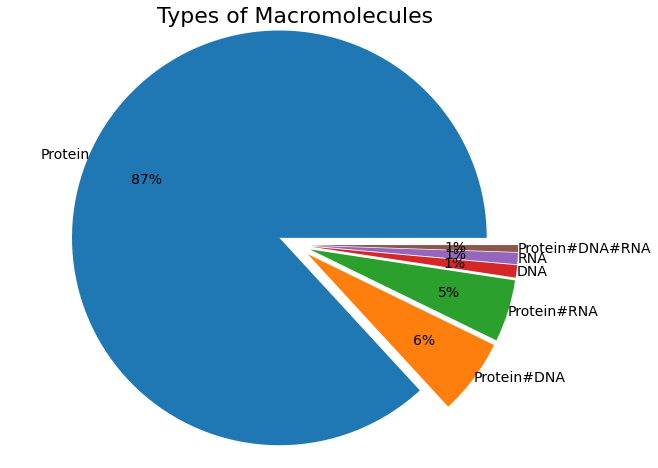

In [23]:
# Plot the types of macromolecules in the form of Pie chart. 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
explode=(0.1,0.09,0.09,0.09,0.09,0.09)
ax.pie(dfcls.values,
       explode=explode,
       autopct='%1.0f%%',
       labels=dfcls.index,
       radius=1.2,
       pctdistance=0.7,
       labeldistance=1.0,
       textprops={'fontsize': 14})
_= plt.title('Types of Macromolecules', y =1, fontsize=22)
#plt.savefig('PieChart.png')

In [24]:
#Select only protein samples, not others and others with proteins
df_prot = df_merge[df_merge['macromoleculeType']=='Protein']
df_prot.sequence.nunique()

87761

In [25]:
# Delete the samples with missing class and sequence
df_cls = df_prot[[type(k)== str for k in df_prot.classification.values]]
df_cs = df_cls[[type(k) == str for k in df_cls.sequence.values]]

df_cs.shape, df_cls.shape, df_prot.shape

((88169, 16), (88169, 16), (88169, 16))

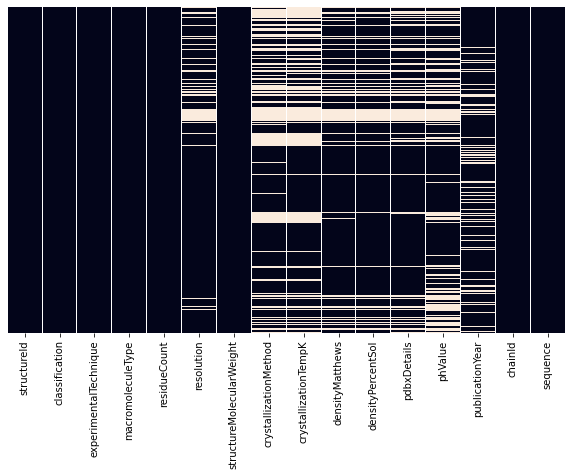

In [26]:
# Data columns with missing values:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cs.isnull(), cbar=False, yticklabels=False)
plt.show()

In [27]:
df_cs.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
9,104L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,332,2.80,37541.04,NaN,NaN,3.04,59.49,NaN,NaN,1993.0,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...


In [28]:
dff = df_cs.reset_index(drop=True)
dff.classification.nunique()

3956

In [29]:
#dff.classification

In [30]:
dff['classification'] = dff.classification.astype('str')
dff['classification'] = dff.classification.str.lower()
dff['classification'] = dff.classification.str.replace(',', '/', regex = True)
dff['classification'] = dff.classification.str.replace(', ', '/', regex = True)
dff['classification'] = dff.classification.str.replace('/ ', '/', regex = True)
dff['classification'] = dff.classification.str.replace(' /', '/', regex = True)
dff['classification'] = dff.classification.str.replace(' ,', '/', regex = True)
dff['classification'] = dff.classification.str.replace('(', '/', regex = True)
dff['classification'] = dff.classification.str.replace(')', '', regex = True)
# Maintaing class ordering. There are the same classes with different order 
#ex. viral protein/immune system and immune system/viral protein
dff['classification'] = dff.classification.apply(lambda x:'/'.join(sorted(x.split('/'))))

In [31]:
dff.classification.nunique()

2684

In [32]:
dff[['classification', 'sequence']].nunique()


classification     2684
sequence          87761
dtype: int64

In [33]:
classes = dff.classification.value_counts()
class_dict = dict()
count = 0
counts = 0

for cat, num in classes.items():
    if num < 2: 
        condition = (dff['classification'] == cat)
        dff = dff[~condition].copy()
    
        
    if num >= 2:
        class_dict[cat] = count
        count += 1
        
    counts += 1
    if counts % 100 == 0:
        print('classes', counts)
#class_dict

classes 100
classes 200
classes 300
classes 400
classes 500
classes 600
classes 700
classes 800
classes 900
classes 1000
classes 1100
classes 1200
classes 1300
classes 1400
classes 1500
classes 1600
classes 1700
classes 1800
classes 1900
classes 2000
classes 2100
classes 2200
classes 2300
classes 2400
classes 2500
classes 2600


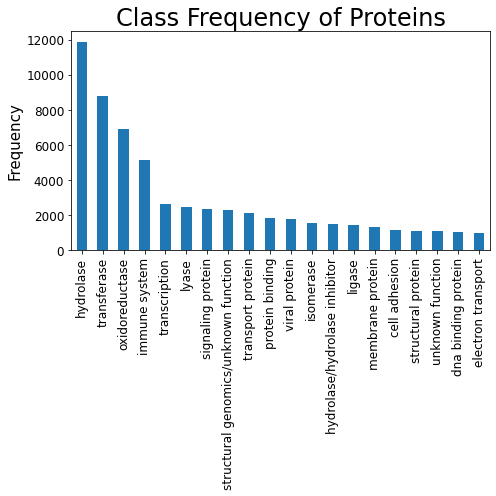

In [34]:
# Print the frequency the top 20 most common classes:
df_class = dff['classification'].value_counts()[:20]

plt.figure(figsize=(7, 7))
df_class.plot(kind='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Class Frequency of Proteins', fontsize=24)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('ClassFreqProteins.pdf')

In [35]:
# Assign the target variable as 'label' for the numerical classes:
dff['label'] = dff['classification'].map(class_dict)
len(dff.sequence), len(dff.label)

(87098, 87098)

In [36]:
dff["classification"][0:10]

0        oxygen transport
1    hydrolase/o-glycosyl
2        oxygen transport
3    hydrolase/o-glycosyl
4    hydrolase/o-glycosyl
5        oxygen transport
6        oxygen transport
7    hydrolase/o-glycosyl
8    hydrolase/o-glycosyl
9    hydrolase/o-glycosyl
Name: classification, dtype: object

In [37]:
dff.label[0:10]

0    48
1    62
2    48
3    62
4    62
5    48
6    48
7    62
8    62
9    62
Name: label, dtype: int64

In [38]:
df = dff
import re
length = []
for x in df.sequence.values:
    x = re.sub(r"\s+", "", x) # remove all the spaces in x if any.
    length.append(len(x))
lengths = pd.DataFrame(length, columns=['lengths']).reset_index()

In [39]:
df = df.reset_index(drop=True).reset_index();

In [40]:
df = df.merge(lengths, on='index', how='inner')

In [41]:
df.drop('index', axis=1, inplace=True)

In [42]:
df_dl = df[['structureId', 'classification', 'sequence', 'lengths', 'label']]

In [43]:
df_dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87098 entries, 0 to 87097
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   structureId     87098 non-null  object
 1   classification  87098 non-null  object
 2   sequence        87098 non-null  object
 3   lengths         87098 non-null  int64 
 4   label           87098 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ MB


In [44]:
# Data for deep learning models.
# This contains only sequences and classifications.

df_dl.to_csv(r'protein_seq-cls.csv')

In [45]:
df_dl.head()

,structureId,classification,sequence,lengths,label
0,101M,oxygen transport,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,48
1,102L,hydrolase/o-glycosyl,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,62
2,102M,oxygen transport,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,48
3,103L,hydrolase/o-glycosyl,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,62
4,104L,hydrolase/o-glycosyl,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,166,62


In [46]:
df.drop(['publicationYear', 'pdbxDetails',
         'crystallizationTempK', 'macromoleculeType',
         'crystallizationMethod'], axis=1, inplace=True)

In [47]:
df = df.groupby('chainId').ffill()

In [48]:
df.dropna(subset=['densityMatthews',
                  'densityPercentSol',
                  'resolution', 'sequence',
                  'phValue'], inplace=True)

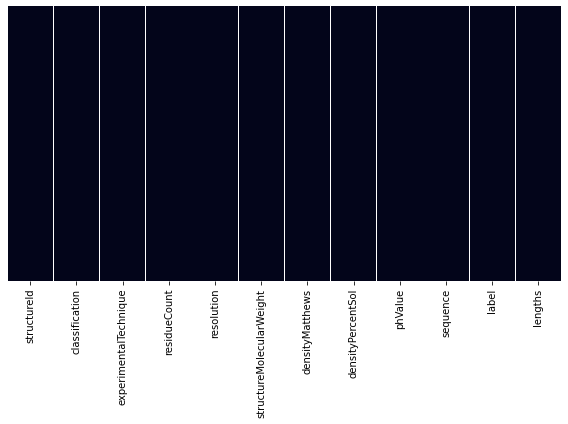

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.tight_layout()
#plt.savefig('HeatmapForMissingdata.pdf')

In [50]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86877 entries, 0 to 87097
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               86877 non-null  object 
 1   classification            86877 non-null  object 
 2   experimentalTechnique     86877 non-null  object 
 3   residueCount              86877 non-null  int64  
 4   resolution                86877 non-null  float64
 5   structureMolecularWeight  86877 non-null  float64
 6   densityMatthews           86877 non-null  float64
 7   densityPercentSol         86877 non-null  float64
 8   phValue                   86877 non-null  float64
 9   sequence                  86877 non-null  object 
 10  label                     86877 non-null  int64  
 11  lengths                   86877 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 8.6+ MB


In [51]:
df.head()

,structureId,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,sequence,label,lengths
0,101M,oxygen transport,X-RAY DIFFRACTION,154,2.07,18112.80,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
1,102L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,165,1.74,18926.61,2.75,55.28,9.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,62,165
2,102M,oxygen transport,X-RAY DIFFRACTION,154,1.84,18010.64,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
3,103L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,167,1.90,19092.72,2.70,54.46,9.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,62,167
4,104L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,332,2.80,37541.04,3.04,59.49,9.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,62,166


In [52]:
df.to_csv(r'protein_cls.csv') # Data saved for the Machine learning algorithms

## EDA

In [53]:
# Loading tidy datasets with features and target for machine learning models.
data = pd.read_csv('protein_cls.csv', index_col=0)
data.head()

,structureId,classification,experimentalTechnique,residueCount,resolution,structureMolecularWeight,densityMatthews,densityPercentSol,phValue,sequence,label,lengths
0,101M,oxygen transport,X-RAY DIFFRACTION,154,2.07,18112.80,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
1,102L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,165,1.74,18926.61,2.75,55.28,9.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,62,165
2,102M,oxygen transport,X-RAY DIFFRACTION,154,1.84,18010.64,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,48,154
3,103L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,167,1.90,19092.72,2.70,54.46,9.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,62,167
4,104L,hydrolase/o-glycosyl,X-RAY DIFFRACTION,332,2.80,37541.04,3.04,59.49,9.0,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...,62,166


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86877 entries, 0 to 87097
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               86877 non-null  object 
 1   classification            86877 non-null  object 
 2   experimentalTechnique     86877 non-null  object 
 3   residueCount              86877 non-null  int64  
 4   resolution                86877 non-null  float64
 5   structureMolecularWeight  86877 non-null  float64
 6   densityMatthews           86877 non-null  float64
 7   densityPercentSol         86877 non-null  float64
 8   phValue                   86877 non-null  float64
 9   sequence                  86877 non-null  object 
 10  label                     86877 non-null  int64  
 11  lengths                   86877 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 8.6+ MB


In [55]:
data.shape

(86877, 12)

In [56]:
data = data.dropna().reset_index().drop(columns='index', axis=1)
data.shape

(86877, 12)

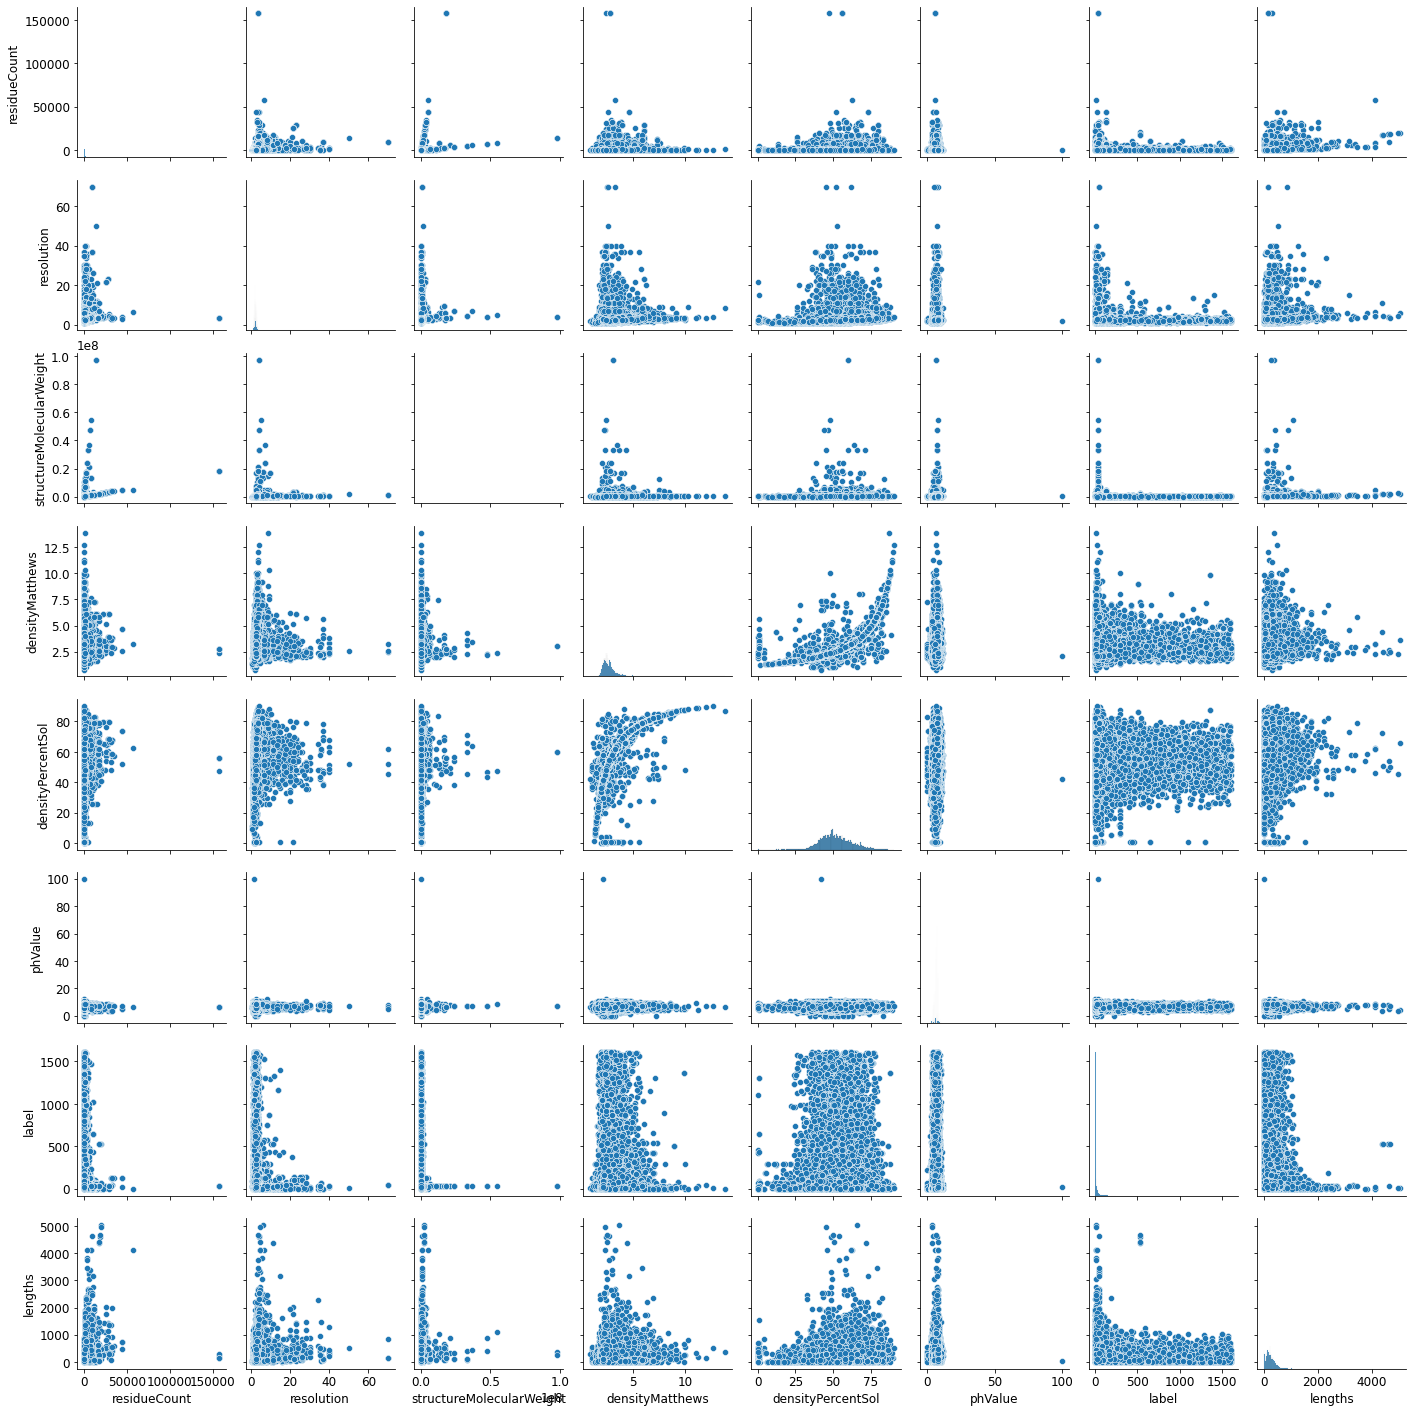

In [57]:
# Plotting the pair distrihution among the features. 
plt.rcParams['font.size'] = 12
sns.pairplot(data)
plt.show()

In [58]:
# Distribution of sequences as Ph-values
def set_phlevel(x):
    if x > 7:
        return 'Basic'
    elif x < 7:
        return 'Acidic'
    else:
        return 'Neutral'

data['ph_level'] = data['phValue'].apply(set_phlevel)
ph_level = data.groupby('ph_level')['ph_level'].count()

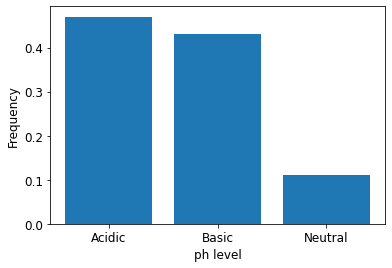

In [59]:
sizes = np.round((ph_level.values) / sum(ph_level.values), 2).tolist()
labels = ph_level.index.tolist()
plt.bar(x=labels, height=sizes)
plt.xlabel('ph level')
plt.ylabel('Frequency')
plt.show()

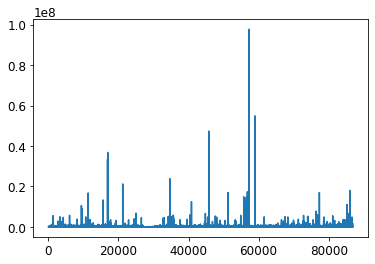

In [60]:
# Plotting counts of protein sequences as a function of
# Molecular weights.
data.structureMolecularWeight.plot()
plt.show()

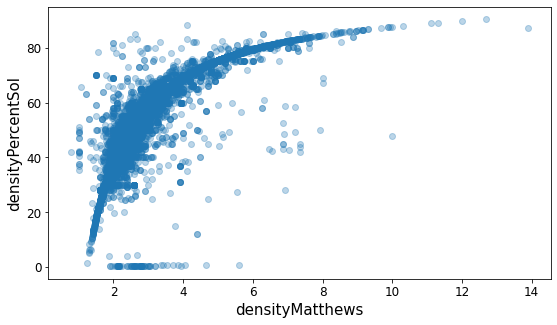

In [61]:
# Relation between the densityMatthews and densityPercentSol
plt.figure(figsize=(9,5))
plt.scatter(x='densityMatthews', y='densityPercentSol', data=data, alpha=0.3)
plt.xlabel('densityMatthews', fontsize=15)
plt.ylabel('densityPercentSol', fontsize=15)
plt.show()

<AxesSubplot:>

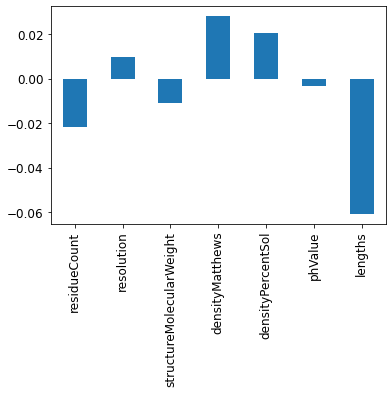

In [62]:
# Correlation of features to target. 
corr_with_class = data.corr()['label']
corr_with_class.drop('label').plot(kind='bar')

Let's move to build machine and deep learnig algorithm.